In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print('training set', len(x_train))
print('test set    ', len(x_test))

training set 50000
test set     10000


In [4]:
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

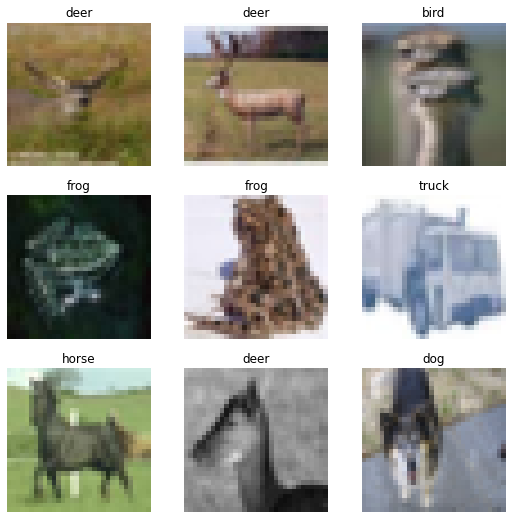

In [5]:
index = np.random.choice(len(x_train), 9, False)

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(x_train[index[i]])
    ax.axis('off')
    ax.set_title(classes[y_train[index[i]][0]])

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(16, 3, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 2, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.GlobalMaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          1

In [9]:
history = model.fit(x_train, y_train, epochs=40, validation_split=0.1, verbose=0)

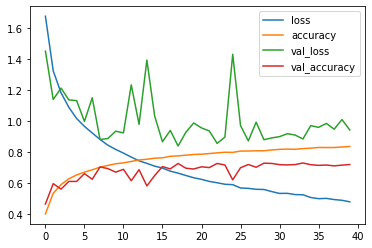

In [10]:
ax = pd.DataFrame(model.history.history).plot()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
pd.DataFrame(history.history).to_csv('/content/drive/My Drive/dna-nn/cifar-10/log.csv', index=False)

In [13]:
model.save('/content/drive/My Drive/dna-nn/cifar-10/model.h5')